In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
import requests
requests.__version__

'2.27.1'

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec3a12ae7b31122d394042a802739664


Beginning Data Retrieval     
-----------------------------


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | beyneu
Processing Record 6 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | palasa
Processing Record 11 of Set 1 | aden
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | torbay
Processing Record 17 of Set 1 | ginda
Processing Record 18 of Set 1 | manggar
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | kodiak

Processing Record 40 of Set 4 | camacha
Processing Record 41 of Set 4 | ulladulla
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | kasongo-lunda
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | pochutla
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | port-cartier
Processing Record 48 of Set 4 | kajaani
Processing Record 49 of Set 4 | ormara
Processing Record 50 of Set 4 | paraguacu paulista
Processing Record 1 of Set 5 | xihe
Processing Record 2 of Set 5 | bargal
City not found. Skipping...
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | vestmannaeyjar
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | amqui
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | seabra
Processing Record 9 of Set 5 | svetlogorsk
Processing Record 10 of Set 5 | ulety
Processing Record 11 of Set 5 | nikolsk
Processing Record 12 of Set 5 | mehtar lam
Processing Record 13 of Set 5 |

Processing Record 29 of Set 8 | durusu
Processing Record 30 of Set 8 | kibaya
Processing Record 31 of Set 8 | playas
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | deputatskiy
Processing Record 34 of Set 8 | copiapo
Processing Record 35 of Set 8 | den helder
Processing Record 36 of Set 8 | shingu
Processing Record 37 of Set 8 | muros
Processing Record 38 of Set 8 | rio grande
Processing Record 39 of Set 8 | cartagena
Processing Record 40 of Set 8 | constitucion
Processing Record 41 of Set 8 | nha trang
Processing Record 42 of Set 8 | dongsheng
Processing Record 43 of Set 8 | port hardy
Processing Record 44 of Set 8 | batagay-alyta
Processing Record 45 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 46 of Set 8 | ucluelet
Processing Record 47 of Set 8 | maues
Processing Record 48 of Set 8 | bogorodskoye
Processing Record 49 of Set 8 | vila
Processing Record 50 of Set 8 | zhigalovo
Processing Record 1 of Set 9 | wattegama
Processing Record 2 of Se

Processing Record 16 of Set 12 | jalu
Processing Record 17 of Set 12 | ponta pora
Processing Record 18 of Set 12 | zabid
Processing Record 19 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 20 of Set 12 | nong han
Processing Record 21 of Set 12 | manta
Processing Record 22 of Set 12 | udachnyy
Processing Record 23 of Set 12 | anapskaya
Processing Record 24 of Set 12 | roma
Processing Record 25 of Set 12 | krabi
Processing Record 26 of Set 12 | nome
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | akyab
Processing Record 29 of Set 12 | brownsville
Processing Record 30 of Set 12 | ayan
Processing Record 31 of Set 12 | taiyuan
Processing Record 32 of Set 12 | maine-soroa
Processing Record 33 of Set 12 | port macquarie
Processing Record 34 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 12 | juruti
Processing Record 36 of Set 12 | sarangani
Processing Record 37 of Set 12 | eskasem
City not found. Skipping...
Proce

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,51.31,88,60,13.35,NZ,2022-11-08 17:33:53
1,Ushuaia,-54.8000,-68.3000,55.02,50,20,20.71,AR,2022-11-08 17:31:35
2,Severo-Kurilsk,50.6789,156.1250,34.14,74,94,7.45,RU,2022-11-08 17:33:20
3,Hermanus,-34.4187,19.2345,62.80,78,69,7.63,ZA,2022-11-08 17:33:53
4,Beyneu,45.3167,55.2000,37.76,67,98,7.29,KZ,2022-11-08 17:33:53
5,Petropavlovsk-Kamchatskiy,53.0452,158.6483,25.39,86,75,2.24,RU,2022-11-08 17:33:54
6,Mahebourg,-20.4081,57.7000,75.49,73,20,5.75,MU,2022-11-08 17:31:49
7,New Norfolk,-42.7826,147.0587,56.71,61,91,1.70,AU,2022-11-08 17:33:54
8,Rikitea,-23.1203,-134.9692,74.93,90,64,15.59,PF,2022-11-08 17:32:59
9,Palasa,18.7667,84.4167,72.09,78,7,3.69,IN,2022-11-08 17:33:54


In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-11-08 17:33:53,-46.6000,168.3333,51.31,88,60,13.35
1,Ushuaia,AR,2022-11-08 17:31:35,-54.8000,-68.3000,55.02,50,20,20.71
2,Severo-Kurilsk,RU,2022-11-08 17:33:20,50.6789,156.1250,34.14,74,94,7.45
3,Hermanus,ZA,2022-11-08 17:33:53,-34.4187,19.2345,62.80,78,69,7.63
4,Beyneu,KZ,2022-11-08 17:33:53,45.3167,55.2000,37.76,67,98,7.29


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

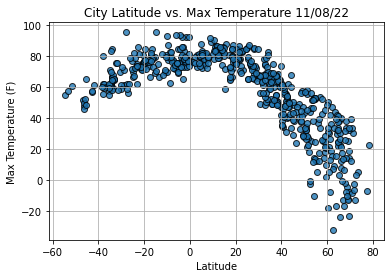

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

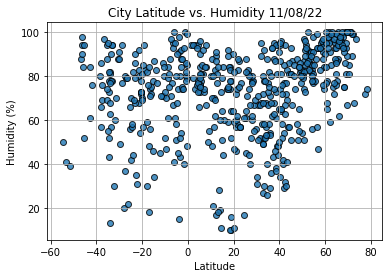

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

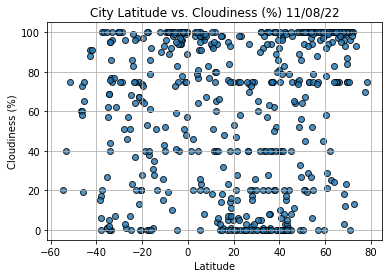

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

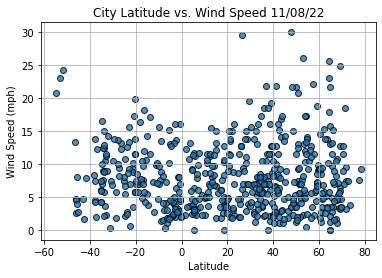

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                     Portland
Country                        US
Date          2022-11-08 17:32:52
Lat                       45.5234
Lng                     -122.6762
Max Temp                    48.49
Humidity                       87
Cloudiness                     75
Wind Speed                   8.99
Name: 13, dtype: object

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

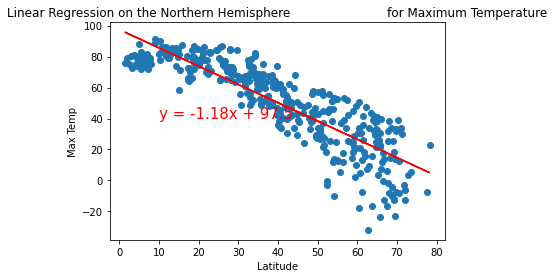

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

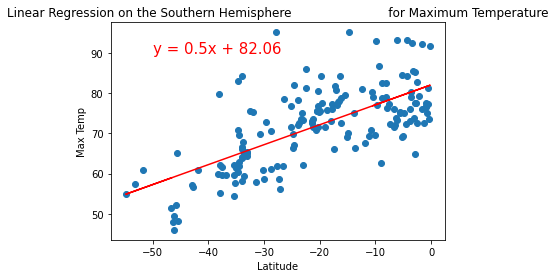

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

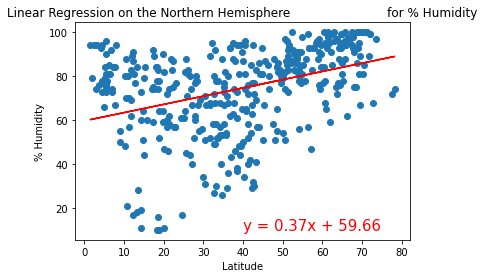

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

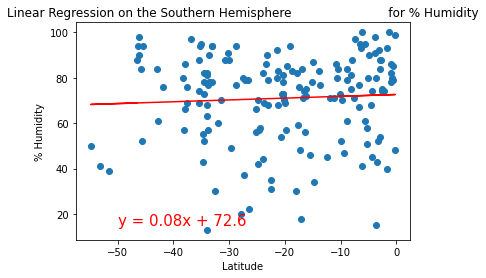

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

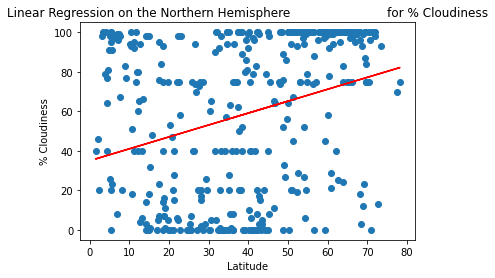

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

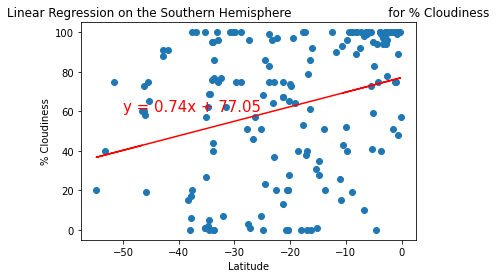

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

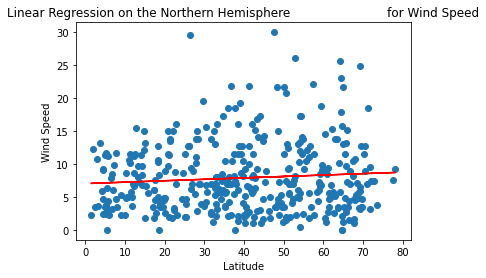

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

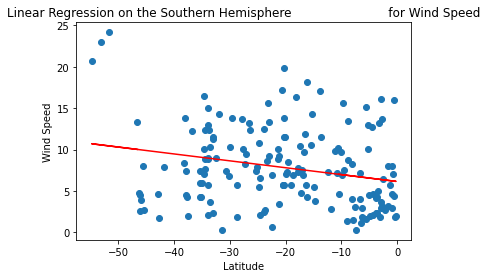

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))